1. underfitting and overfitting
- methods for avoiding overfitting
  - enlarge the amount of data
  - decrease the complexity of a model
  - regularization
  \begin{align}
  Loss = Error(y, \hat{y}) + \lambda\sum_{i=0}^N|w_i|
  \end{align}
  - dropout

2. sigmoid and binary classification
- mean squared error and cross entropy
  \begin{align}
  MSE &= \frac{1}{2}||y - o||_2^2 \\
  CE &= -\sum_{y\in\{0,1\}}P(y)\log_2Q(y)
  \end{align}
- 오차가 클때 큰 기울기 값을 갖는 것이 정당한 이유가 될 수 있는가?
- 두 가지의 손실 함수가 특정한 문제에 더 적합한 이유는 무엇인가?

In [4]:
import numpy as np
def logistic_function(x, L=1, k=1, x0=0):
  return L / (1 + np.exp(-k*(x - x0)))

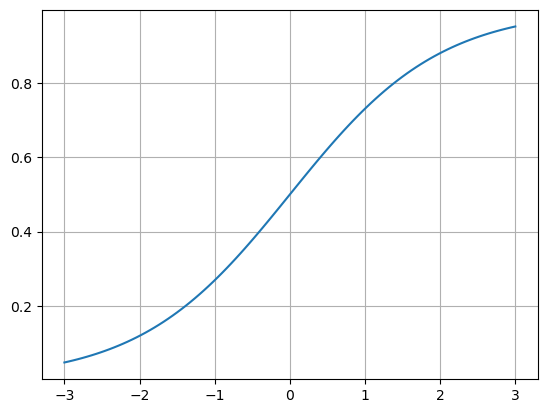

In [6]:
x = np.linspace(-3, 3, 101)
y = logistic_function(x)

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.grid()

3. exercise, iris

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
x_data = [
  [1,2],
  [2,3],
  [3,1],
  [4,3],
  [5,3],
  [6,2]
]
y_data = [
  [0],
  [0],
  [0],
  [1],
  [1],
  [1],
]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [12]:
model = nn.Sequential(
  nn.Linear(2, 1),
  nn.Sigmoid()
)

optimizer = optim.SGD(model.parameters(), lr=1)

In [13]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    prediction = hypothesis >= torch.FloatTensor([[0.5]])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print(f'{epoch}: {accuracy} - {cost}')

0: 0.5 - 1.2103852033615112
100: 1.0 - 0.1340366154909134
200: 1.0 - 0.08040323853492737
300: 1.0 - 0.057778388261795044
400: 1.0 - 0.04522598907351494
500: 1.0 - 0.03721140697598457
600: 1.0 - 0.03163684532046318
700: 1.0 - 0.027529016137123108
800: 1.0 - 0.0243732538074255
900: 1.0 - 0.021871313452720642
1000: 1.0 - 0.019838212057948112


In [14]:
new_data = torch.FloatTensor([[4,2]])
y_pred = model(new_data) >= torch.FloatTensor([[0.5]])
print(y_pred.item())

True


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()
x_train = iris.data[:100]
y_train = iris.target[:100]
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

In [18]:
print(y.shape)
y_train = torch.unsqueeze(y_train, 1)
print(y.shape)

(101,)
(101,)


In [19]:
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [23]:
model = nn.Sequential(
  nn.Linear(4, 1),
  nn.Sigmoid()
)

optimizer = optim.SGD(model.parameters(), lr=1)

In [24]:
nb_epochs = 50
cost_history = []
accuracy_history = []
for epoch in range(nb_epochs + 1):
  for idx, (x_train, y_train) in enumerate(dataloader):
    hypothesis = model(x_train)
    cost = F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    prediction = hypothesis >= torch.FloatTensor([[0.5]])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    
    cost_history.append(cost.item())
    accuracy_history.append(accuracy)

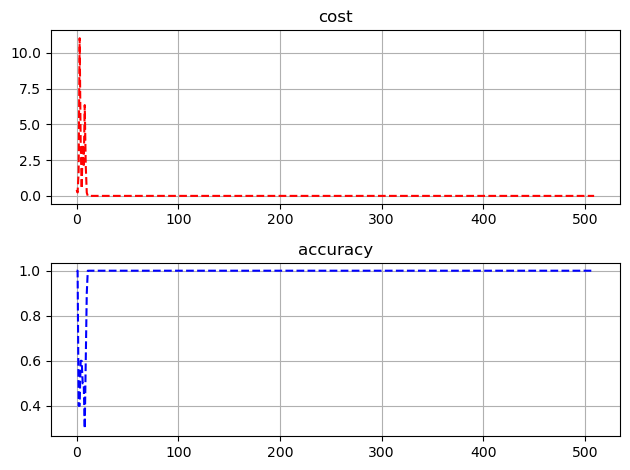

In [25]:
plt.rcParams['axes.grid'] = True
_, axes = plt.subplots(2, 1)
axes[0].plot(cost_history, 'r--')
axes[0].set_title('cost')
axes[1].plot(accuracy_history, 'b--')
axes[1].set_title('accuracy')
plt.tight_layout()